In [57]:
import time
def time_now():
    return time.asctime()

print(time_now())

Thu Dec  2 14:02:39 2021


In [56]:
def lam(x):
    return lambda a, b = 1 : a + b + x

fun = lam(1)
print(fun(2,3))
print(lam(1)(2,3))


def fun2_def(a):
    def fun3(b):
        return a + b
    return fun3
print(fun2_def(3)(4))

fun2_lambda = lambda a : lambda b : a + b
print(fun2_lambda(1)(2))


6
6
3
7


In [67]:
def args1(*args):
    return args[2]

print(args1(1,2,3))

def args2(**args):
    return args['key2']

print(args2(
    key1 = 2,
    key2 = 5
))

def args3(key1, key2 = 2, key3 = 3):
    return key2

print(args3(
    key1 = 1,
    key2 = 3
))

3
5
3


[5.2200008  6.58657047 6.06252307 5.92509277 3.99315447 4.85232466
 3.5812846  4.4519313  5.71880631 4.93105571][ 8.53146033  4.92402201  8.5618838   8.0377508   7.81929666  9.29228219
 10.88914475  8.86989342  9.31118039  9.34403021]


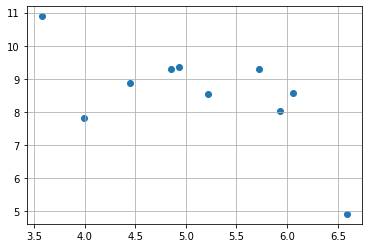

In [68]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 10)
y = numpy.random.normal(10.0, 2.0, 10)

print("{0}{1}".format(x, y))

plt.scatter(x, y)
plt.grid()
plt.show()

[ 3.05512774 13.3636883   4.26809944 -3.93730006  2.09368519]
[  87.71040801 -179.17169702  -46.61190001 -201.57774844   19.51137884]


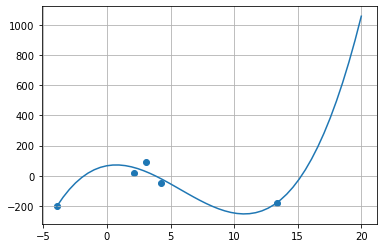

In [48]:
import numpy
import matplotlib.pyplot as plt

n_trand = lambda a, b, c : numpy.random.normal(a, b, c)
distribution_size = 5
x = n_trand(5.0, 5.0, distribution_size)
y = n_trand(5.0, 95, distribution_size)

model = numpy.poly1d(numpy.polyfit(x, y, 3))
line = numpy.linspace(min(x), 20, 50)

print (x)
print (y)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.grid()
plt.show()

In [89]:
# bad practice:
# f = open('ref_data.csv', 'rt')
# fw = open('data_w.t', 'w')
# fa = open('data_a.t', 'a')
# instead use:
with open('ref_data.csv', 'rt') as f, open('data_w.t', 'w') as fw, open('data_a.t', 'a') as fa:
    # print(f.read())
    # print(f.readline(), end = '')
    for line in f:
        try:
            fw.write(line[2])
            fa.write(line[0])
        except Exception as err:
            print(f'Error: {err}')
        print(line, end = '')

# not necessary when using 'with'
# f.close()
# fw.close()
# fa.close()

a,1
b,2
c,5

In [5]:
import matplotlib.pyplot as plt
from pylab import arange
from math import e
from math import pi
from math import sin
from math import cos
from numpy import poly1d

# need some zero vectors...
def zeroV(m):
    z = [0]*m
    return(z)

#INPUT: n; x0, x1, ... ,xn; a0 = f(x0), a1 =f(x1), ... , an = f(xn).
def cubic_spline(n, xn, a):
    # """function cubic_spline(n,xn, a, xd) interpolates between the knots
    #    specified by lists xn and a. The function computes the coefficients
    #    and outputs the ranges of the piecewise cubic splines."""

    h = zeroV(n-1)

    # alpha will be values in a system of eq's that will allow us to solve for c
    # and then from there we can find b, d through substitution.
    alpha = zeroV(n-1)

    # l, u, z are used in the method for solving the linear system
    l = zeroV(n+1)
    u = zeroV(n)
    z = zeroV(n+1)

    # b, c, d will be the coefficients along with a.
    b = zeroV(n)
    c = zeroV(n+1)
    d = zeroV(n)

    for i in range(n-1):
        # h[i] is used to satisfy the condition that
        # Si+1(xi+l) = Si(xi+l) for each i = 0,..,n-1
        # i.e., the values at the knots are "doubled up"
        h[i] = xn[i+1]-xn[i]

    for i in range(1, n-1):
        # Sets up the linear system and allows us to find c.  Once we have
        # c then b and d follow in terms of it.
        alpha[i] = (3./h[i])*(a[i+1]-a[i])-(3./h[i-1])*(a[i] - a[i-1])

    # I, II, (part of) III Sets up and solves tridiagonal linear system...
    # I
    l[0] = 1
    u[0] = 0
    z[0] = 0

    # II
    for i in range(1, n-1):
        l[i] = 2*(xn[i+1] - xn[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = 0
    c[n] = 0

    # III... also find b, d in terms of c.
    for j in range(n-2, -1, -1):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3.
        d[j] = (c[j+1] - c[j])/(3*h[j])

        # Now that we have the coefficients it's just a matter of constructing
    # the appropriate polynomials and graphing.
    for j in range(n-2):
        cub_graph(a[j],b[j],c[j],d[j],xn[j],xn[j+1])

    plt.show()

def cub_graph(a,b,c,d, x_i, x_i_1):
    # """cub_graph takes the i'th coefficient set along with the x[i] and x[i+1]'th
    #    data pts, and constructs the polynomial spline between the two data pts using
    #    the poly1d python object (which simply returns a polynomial with a given root."""

    # notice here that we are just building the cubic polynomial piece by piece
    root = poly1d(x_i,True)
    poly = 0
    poly = d * root ** 3
    poly = poly + c * root ** 2
    poly = poly + b*root
    poly = poly + a

    # Set up our domain between data points, and plot the function
    pts = arange(x_i,x_i_1, 0.001)
    plt.plot(pts, poly(pts), '-')
    return


# These are our data points
x_vals = [0, 1./6, 1./3, 1./2, 7./12, 2./3, 3./4, 5./6, 11./12, 1]

# Set up the domain
x_domain = arange(0,2, 1e-2)

fx = zeroV(10)

# Defines the function so we can get our fx values
def sine_func(x):
    return 1.6 * e ** (-2 * x) * sin(3 * pi * x)

for i in range(len(x_vals)):
    fx[i] = sine_func(x_vals[i])

# Run cubic_spline interpolant.
cubic_spline(10,x_vals,fx)

TypeError: unsupported operand type(s) for -: 'float' and 'list'

In [7]:
from scipy import interpolate

def f(x):
    x_points = [ 0, 1, 2, 3, 4, 5]
    y_points = [12,14,22,39,58,77]

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

print(f(1.25))

15.203125000000002


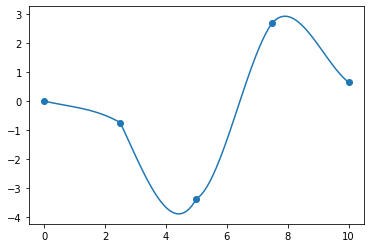

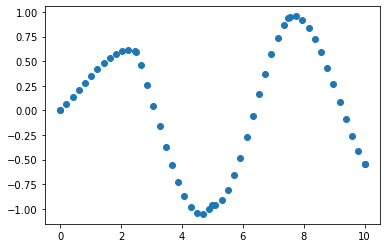

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def cubic_interp1d(x0, x, y):
    """
    Interpolate a 1-D function using cubic splines.
      x0 : a float or an 1d-array
      x : (N,) array_like
          A 1-D array of real/complex values.
      y : (N,) array_like
          A 1-D array of real values. The length of y along the
          interpolation axis must be equal to the length of x.

    Implement a trick to generate at first step the cholesky matrice L of
    the tridiagonal matrice A (thus L is a bidiagonal matrice that
    can be solved in two distinct loops).

    additional ref: www.math.uh.edu/~jingqiu/math4364/spline.pdf
    """
    x = np.asfarray(x)
    y = np.asfarray(y)

    # remove non finite values
    # indexes = np.isfinite(x)
    # x = x[indexes]
    # y = y[indexes]

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + zi1/(6*hi1)*(x0-xi0)**3 + (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

def test1():
    x = np.linspace(0, 10, 5)
    y = np.tan(x)
    plt.scatter(x, y)

    x_new = np.linspace(0, 10, 100)
    plt.plot(x_new, cubic_interp1d(x_new, x, y))

    plt.show()

def test2():
    x = np.linspace(0, 10, 5)
    y = np.sin(x)
    plt.scatter(x, y)

    x_new = np.linspace(0, 10, 50)
    plt.plot(x_new, cubic_interp1d(x_new, x, y), 'o')

    plt.show()

test1()
test2()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1.0, 1.199, 1.392, 1.573, 1.7359999999999998, 1.875, 1.984, 2.0570000000000004, 2.0879999999999996, 2.0709999999999997, 2.0, 1.8719999999999999, 1.695999999999998, 1.4840000000000018, 1.248000000000001, 1.0]


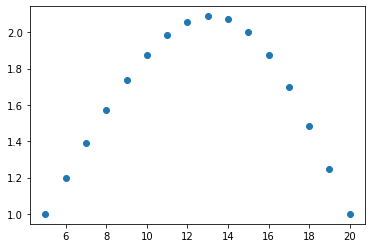

In [91]:

# x = np.arange(5, 21, 1)
x = []
y = []


for i in range (5, 16):
    x.append(i)
    y.append(-0.001 * i ** 3 + 0.015 * i ** 2 + 0.125 * i + 0.125)

for i in range (16, 21):
    x.append(i)
    y.append(0.002 * i ** 3 - 0.12 * i ** 2 + 2.15 * i - 10)
print(x)
print(y)

plt.plot(x, y, 'o')
plt.show()

[10, 5, 5]
[-2.4000000000000004]


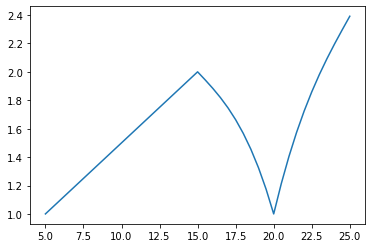

In [140]:
# x=[5,7.5,9.9,12.9,13.2,15.1,16.3,16.8]
# y=[0.024,0.0437,0.0797,0.171,0.199,0.326,0.846,0.972]
x=[5, 15, 20, 25]
y=[1, 2, 1, 5]
n=len(x)

h=[x[i] - x[i-1] for i in range(1, n)]
print(h)
h1=[x[i+1] - x[i] for i in range(n-1)]

a=[h[i] for i in range(1,n-2)]
c=[2.*(h[i]+h[i+1]) for i in range(n-2)]
b=[h[i] for i in range(2,n-1)]
# f=[6.*((y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]) for i in range(1,n-1)]
f=[6 *((y[i+1]-y[i])/h[i+1]-(y[i]-y[i-1])/h[i]) for i in range(1,n-2)]
print(f)


#progonochnye coefficienty
A=[0.]
B=[0.]
for m in range(len(a)):
    B.append((f[m]-a[m]*B[-1])/(a[m]*A[-1]+c[m]))
    A.append(-1.*b[m]/(A[-1]*a[m]+c[m]))

#koefficienty of splyne
C=[(f[-1]-a[-1]*B[-1])/(c[-1]+a[-1]*A[-1])]
for k in range (2,len(A)+1):
    C.insert(0,A[-k]*C[-1]+B[-k])
C.insert(0,0.)
C.append(0.)
k3=[]
k2=[]
k1=[]
for j in range(1,len(C)):
    k3.append((C[j]-C[j-1])/h[j-1])
    k2.append((0.5*h[j-1]*C[j-1])-((1./6.)*((h[j-1])**2.)*k3[j-1])+((y[j]-y[j-1])/h[j-1]))
    #k2.append(h[j-1]*(2.*C1[j]+C1[j-1])/6.+(y[j]-y[j-1])/h[j-1])
    k1.append(y[j-1])

#zadanie function
def spline(z,xt,a1,b1,c1,d1):
    return a1+b1*(z-xt)+(c1/2.)*((z-xt)**2.)+(d1/6.)*((z-xt)**3.)

#postroenie splyne
x2=[]
y2=[]
for i in range(n-1):
    for j in range(11):
        x2.append(x[i]+(h[i]/10.)*j)
        y2.append(spline(x2[-1],x[i],k1[i],k2[i],C[i],k3[i]))
plt.plot(x2,y2)

In [134]:
x=[5, 15, 20, 25]
y=[1, 2, 1, 5]
# x=[5,7.5,9.9,12.9,13.2,15.1,16.3,16.8]
# y=[0.024,0.0437,0.0797,0.171,0.199,0.326,0.846,0.972]
n=len(x)


a = [y[i] for i in range(0, n)]
print("a:", a)
b = [0] * (n - 1)
print("b:", b)
d = [0] * (n - 1)
print("d:", d)
h = [x[i + 1] - x[i] for i in range(0, n - 1)]
print("h:", h)
alpha = [3 / h[i] * (a[i+1] - a[i]) - 3 / h[i-1] * (a[i] - a[i-1]) for i in range(1, n - 1)]
print("alpha:", alpha)

c = [0] * (n - 1)
print("c:", c)
l = [0] * (n - 1)
print("l:", l)
u = [0] * (n - 1)
print("u:", u)
z = [0] * (n - 1)
print("z:", z)

l[0] = 1
u[0] = z[0] = 0
for i in range(1, n - 1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * u[i-1]
    u[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) /l[i]
l[n] = 1
z[n] = c[n] = 0



a: [1, 2, 1, 5]
b: [0, 0, 0]
d: [0, 0, 0]
h: [10, 5, 5]
alpha: [-0.8999999999999999, 3.0]
c: [0, 0, 0]
l: [0, 0, 0]
u: [0, 0, 0]
z: [0, 0, 0]


IndexError: list index out of range